In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adam import AdamOptim
from SGD import SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from Logreg import LogisticRegression
from irls_optimizer import IRLS
from sklearn.preprocessing import LabelEncoder
np.seterr(divide = 'ignore') 
np.seterr(invalid='ignore')
np.seterr(over ='ignore')


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

## NBA PLAYERS DATA ##

In [63]:
# data:
url = 'data/big/nba-players.csv'
dataframe = pd.read_csv(url)
dataframe.drop('name', axis=1, inplace=True)
dataframe.drop('Unnamed: 0', axis=1, inplace=True)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]


In [6]:
X.shape

(1340, 19)

In [22]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"nba_data, adam")
    with open('losses.csv', 'a') as l:
        l.write(f"nba_data, adam")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.01)

            logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")
        f.write('\n')

Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Epoch::   1%|          | 6/500 [00:00<00:06, 73.86it/s]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 8/500 [00:00<00:06, 77.41it/s]


Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss


Epoch::  18%|█▊        | 88/500 [00:00<00:02, 174.69it/s]


Early stopping after epoch 88
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|▏         | 7/500 [00:00<00:03, 157.87it/s]


Early stopping after epoch 7
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 11/500 [00:00<00:02, 222.61it/s]


Early stopping after epoch 11
Reverting to the weights corresponding to the lowest validation loss


In [23]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"nba_data, irls")
    with open('losses.csv', 'a') as l:
        l.write(f"nba_data, irls")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            irls_optimizer = IRLS()

            logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   1%|          | 6/500 [00:03<04:57,  1.66it/s]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 12/500 [00:06<04:15,  1.91it/s]


Early stopping after epoch 12
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 9/500 [00:04<04:06,  1.99it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 8/500 [00:04<04:36,  1.78it/s]


Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 6/500 [00:03<05:14,  1.57it/s]

Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


In [38]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
with open('my_results.csv', 'a') as f:    
    f.write(f"nba_data, sgd")
    with open('losses.csv', 'a') as l:
        l.write(f"nba_data, sgd")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.00001)

            logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch:: 100%|██████████| 500/500 [00:02<00:00, 245.27it/s]


In [64]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"data_set, algorithm")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", seed_{seed}_acc")
    f.write('\n')
    f.write(f"nba_data, lda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write('\n')
    f.write(f"nba_data, qda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write('\n')
    f.write(f"nba_data, dt")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write('\n')
    f.write(f"nba_data, rf")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write('\n')


## SMOKING DATA ##

In [56]:
url = "data/big/smoking.csv"
dataframe = pd.read_csv(url)
dataframe.drop('oral', axis=1, inplace=True)
data = dataframe.values

X, y = data[:,:-1], data[:,-1]
X[:,1] = LabelEncoder().fit_transform(X[:,1])
X[:,-1] = LabelEncoder().fit_transform(X[:,-1])

In [4]:
X.shape

(55692, 25)

In [40]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"smoking_data, adam")
    with open('losses.csv', 'a') as l:
        l.write(f"smoking_data, adam")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)
            y_train = y_train.astype('int')
            y_test = y_test.astype('int')
            
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.001)

            logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   6%|▋         | 32/500 [00:14<03:32,  2.20it/s]


Early stopping after epoch 32
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 9/500 [00:04<03:52,  2.11it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 9/500 [00:03<03:25,  2.39it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


Epoch::   9%|▉         | 46/500 [00:19<03:16,  2.31it/s]


Early stopping after epoch 46
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 8/500 [00:03<03:55,  2.09it/s]

Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss


In [29]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"smoking_data, irls")
    with open('losses.csv', 'a') as l:
        l.write(f"smoking_data, irls")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)
            y_train = y_train.astype('int')
            y_test = y_test.astype('int')
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            irls_optimizer = IRLS()

            logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=5, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   0%|          | 0/500 [00:06<?, ?it/s]


MemoryError: Unable to allocate 14.8 GiB for an array with shape (44553, 44553) and data type float64

In [36]:
#SGD
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"smoking_data, sgd")
    with open('losses.csv', 'a') as l:
        l.write(f"smoking_data, sgd")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
            X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)
            y_train = y_train.astype('int')
            y_test = y_test.astype('int')
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.01)

            logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")
    f.write('\n')

Epoch::   3%|▎         | 14/500 [00:01<00:44, 10.85it/s]


Early stopping after epoch 14
Reverting to the weights corresponding to the lowest validation loss


Epoch::   3%|▎         | 17/500 [00:01<00:41, 11.58it/s]


Early stopping after epoch 17
Reverting to the weights corresponding to the lowest validation loss


Epoch::   3%|▎         | 13/500 [00:01<00:40, 11.99it/s]


Early stopping after epoch 13
Reverting to the weights corresponding to the lowest validation loss


Epoch::   9%|▉         | 45/500 [00:03<00:39, 11.50it/s]


Early stopping after epoch 45
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 12/500 [00:01<00:41, 11.68it/s]

Early stopping after epoch 12
Reverting to the weights corresponding to the lowest validation loss


In [58]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open('my_results.csv', 'a') as f:    
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    f.write('\n')
    f.write(f"smoking_data, lda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write('\n')
    f.write(f"smoking_data, qda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write('\n')
    f.write(f"smoking_data, dt")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write('\n')
    f.write(f"smoking_data, rf")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write('\n')


## BANANA DATA ##

In [59]:
from sklearn.impute import SimpleImputer
url = 'data/small/banana_quality.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)
X.shape


(8000, 7)

Epoch::  21%|██        | 104/500 [00:01<00:05, 66.44it/s]


Early stopping after epoch 104
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8792029566677454


Epoch::  14%|█▍        | 71/500 [00:01<00:07, 54.19it/s]


Early stopping after epoch 71
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.880522356684812


Epoch::  15%|█▌        | 76/500 [00:01<00:06, 66.33it/s]


Early stopping after epoch 76
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8818268766438655


Epoch::  19%|█▉        | 96/500 [00:01<00:06, 65.99it/s]


Early stopping after epoch 96
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8789640856342538


Epoch:: 100%|██████████| 500/500 [00:08<00:00, 58.13it/s]


accuracy : 0.8786008133638854


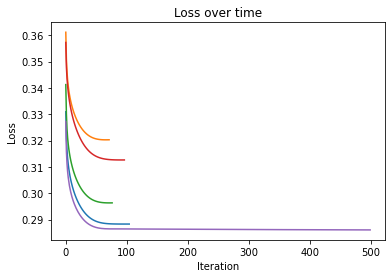

In [42]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"banana_data, adam")
    with open('losses.csv', 'a') as l:
        l.write(f"banana_data, adam")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.01)

            logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
            logistic_regression_model.plot_loss()
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

In [8]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::   0%|          | 0/500 [00:47<?, ?it/s]


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Epoch::   6%|▋         | 32/500 [00:00<00:08, 53.77it/s]


Early stopping after epoch 32
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8840820018088634


Epoch:: 100%|██████████| 500/500 [00:08<00:00, 61.32it/s]


accuracy : 0.8855889724310777


Epoch:: 100%|██████████| 500/500 [00:06<00:00, 76.94it/s]


accuracy : 0.8687499999999999


Epoch:: 100%|██████████| 500/500 [00:05<00:00, 83.95it/s]


accuracy : 0.8725490808857999


Epoch:: 100%|██████████| 500/500 [00:06<00:00, 81.22it/s]


accuracy : 0.8607796616586425


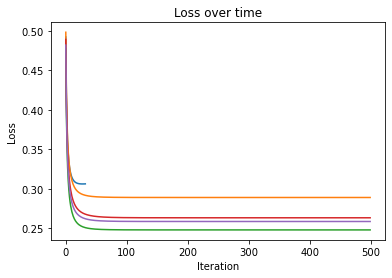

In [45]:
#SGD
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"banana_data, sgd")
    with open('losses.csv', 'a') as l:
        l.write(f"banana_data, sgd")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
            X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta = 0.01)

            logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
            logistic_regression_model.plot_loss()
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

In [60]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open('my_results.csv', 'a') as f:    
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    f.write(f"banana_data, lda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write('\n')
    f.write(f"banana_data, qda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write('\n')
    f.write(f"banana_data, dt")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write('\n')
    f.write(f"banana_data, rf")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write('\n')


### with interactions ###

In [61]:
from utils import createFeatureInteractions
X_int = createFeatureInteractions(X)
print(len(X[0]),len(X_int[0]))

7 28


In [48]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open('my_results.csv', 'a') as f:    
    f.write(f"banana_data, adam+int")
    with open('losses.csv', 'a') as l:
        l.write(f"banana_data, adam+int")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.01)

            logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Epoch::  28%|██▊       | 140/500 [00:06<00:17, 20.71it/s]


Early stopping after epoch 140
Reverting to the weights corresponding to the lowest validation loss


Epoch::  10%|█         | 52/500 [00:02<00:20, 21.55it/s]


Early stopping after epoch 52
Reverting to the weights corresponding to the lowest validation loss


Epoch::   4%|▎         | 18/500 [00:00<00:22, 21.79it/s]


Early stopping after epoch 18
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 9/500 [00:00<00:26, 18.43it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


Epoch::   5%|▍         | 23/500 [00:01<00:21, 22.70it/s]

Early stopping after epoch 23
Reverting to the weights corresponding to the lowest validation loss


In [49]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
ss = StandardScaler()
X_scaled = ss.fit_transform(X_int)
with open('my_results.csv', 'a') as f:    
    f.write(f"banana_data, sgd+int")
    with open('losses.csv', 'a') as l:
        l.write(f"banana_data, sgd+int")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
            X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.01)

            logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
            y_pred = logistic_regression_model.predict(X_test)
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::  25%|██▌       | 125/500 [00:01<00:03, 94.30it/s]

Early stopping after epoch 125
Reverting to the weights corresponding to the lowest validation loss


In [7]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Epoch::   0%|          | 0/500 [05:23<?, ?it/s]


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [62]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open('my_results.csv', 'a') as f:    
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    f.write(f"banana_data, lda+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write('\n')
    f.write(f"banana_data, qda+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write('\n')
    f.write(f"banana_data, dt+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write('\n')
    f.write(f"banana_data, rf+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write('\n')
